In [1]:
import numpy as np
from scipy import stats

# t -Test

## t-Test for one sample

### Research Problem
The HR department of the company believes that the average salary of employees is $60,000 per year. Conduct a one-sample t-test to determine whether there is enough evidence to support this claim. Use a significance level of 0.05.

###  Data Set
salaries of employees in a company (thousands of dollars per year)

In [4]:
data = np.array([47, 52, 58, 62, 65, 48, 50, 51, 53, 55, 58, 61, 63, 55, 56, 49, 50, 54, 57, 59])

### Statistical hypothesis
$$
H_0: \mu = 60 \\
H_1: \mu \ne 60
$$


In [10]:
mu_hyp = 60

In [5]:
alpha = 0.05
df = len(data)-1

In [7]:
# this is a two tailed test
t_star = stats.t.ppf(1-alpha/2,df)
t_star

2.093024054408263

### Decision Rule
Reject $H_0$ at the .05 level of significance if $t ≥ 2.093$ or if $t ≤ –2.093$.

### Calculation
$$
t = \frac {\bar X - \mu_{hyp}} {s_{\bar X}}
$$
where,
Estimated standard error of the mean,
$$
s_{\bar x} = \frac {s = \sqrt \frac {SS} {df}} {\sqrt n}
$$
and,
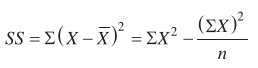

In [8]:
def t_score(X,mu):
    X_bar = X.mean()
    n = len(X)
    SS= np.sum((X-X_bar)**2)
    SS = np.sqrt(SS/(n-1))
    
    sx = SS / np.sqrt(n)
    return (X_bar - mu) / sx

In [11]:
t = t_score(data,mu_hyp)

In [15]:
t >=t_star or t<= -t_star,t

(True, -4.159846966351917)

In [47]:
# p-value for two-tailed test
p = stats.t.sf(abs(t), df=df)*2
p>alpha,p

(False, 1.9045970386175638e-65)

### Decision
Reject $H_0$ at the .05 level of significance because t =-4.15, and p=0.0005 not greater than alpha.

### Interpretation
The average salary is not $60,000 and there is enough evidence to reject the null hypothesis.

## Two Sample t-Test


### Research Problem
Does the mean height of men differ significantly from the mean height of women in a particular population?

### Data set
The heights (in inches) of 100 randomly selected men and 100 randomly selected women 

In [18]:
Men = np.array([68, 70, 72, 66, 74, 69, 71, 70, 67, 71, 73, 72, 69, 68, 70, 71, 68, 72, 70, 69, 71, 73, 68, 72, 71, 70, 67, 73, 69, 70, 72, 68, 70, 69, 71, 73, 67, 72, 71, 69, 70, 68, 72, 73, 70, 69, 71, 68, 72, 70, 71, 67, 73, 69, 70, 72, 68, 70, 69, 71, 73, 67, 72, 71, 69, 70, 68, 72, 73, 70, 69, 71, 68, 72, 70, 71, 67, 73, 69, 70, 72, 68, 70, 69, 71, 73, 67, 72, 71, 69, 70, 68, 72, 73, 70, 69, 71])
Women = np.array([64, 63, 66, 67, 62, 65, 63, 64, 66, 62, 65, 63, 64, 66, 62, 65, 63, 64, 66, 62, 65, 63, 64, 66, 62, 65, 63, 64, 66, 62, 65, 63, 64, 66, 62, 65, 63, 64, 66, 62, 65, 63, 64, 66, 62, 65, 63, 64, 66, 62, 65, 63, 64, 66, 62, 65, 63, 64, 66, 62, 65, 63, 64, 66, 62, 65, 63, 64, 66, 62, 65, 63, 64, 66, 62, 65, 63, 64, 66, 62, 65, 63, 64, 66, 62, 65, 63, 64, 66, 62, 65, 63, 64, 66, 62, 65, 63, 64, 66])


### Statistical hypothesis
$$
H_0: \mu_1 - \mu_2 >0 \\
H_1: \mu_1 - \mu_2 \le 0
$$


In [19]:
alpha = 0.01
df = len(Men) + len(Women) -2 

In [25]:
# this is a left-tailed test
t_star = stats.t.ppf(q=alpha,df=df)
t_star

-2.3457228057724366


### Decision Rule
Reject $H_0$ at the .01 level of significance if $t \le -2.345$


### Calculation
$$
t = \frac {(\bar X_1 - \bar X_2 ) - (\mu_1 - \mu_2)} {s_{\bar X_1- \bar X_2}}
$$
where estimated standard error is,
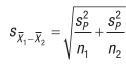
and,
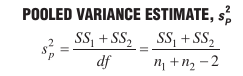

In [35]:
def t_score_2(X1,X2,mu1,mu2):
    n1 = len(X1)
    n2 = len(X2)
    df = n1+n2 -2
    
    X1_ = X1.mean()
    X2_ = X2.mean()
    s1 = X1.std()
    s2 = X2.std()
    
    sp = np.sqrt(
       ( ( (n1-1)*s1**2 ) + ( (n2-1)*s2**2) ) /df
    )
    
    sx1x2 = sp * np.sqrt(1/n1 + 1/n2)
    return ((X1_ - X2_) - (mu1 - mu2)) / sx1x2

In [44]:
t = t_score_2(Men,Women,0,0)

In [45]:
t<= t_star,t

(False, 26.125180108395675)

In [57]:
stats.ttest_ind(Men,Women,0,True)

Ttest_indResult(statistic=25.991210934513738, pvalue=4.1418749145848964e-65)

In [53]:
#p-value for left-tailed test
p = stats.t.sf(abs(t), df=df)
p>alpha,p

(False, 9.522985193087819e-66)

### Decision
Retain $H_0$ at the .01 level of significance because t =26.1251.

### Interpretation
There is evidence that the mean height of men differ significantly from the mean height of women in a particular population at 0.01 level of significance.